In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/formatted_flights.csv')
df.head()

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.


In [0]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.


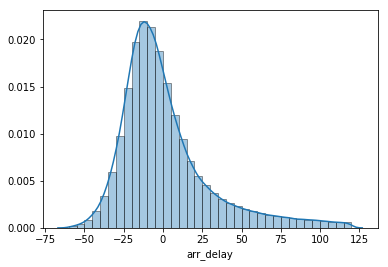

In [5]:
sns.distplot(df.arr_delay, hist=True, bins=int(180/5), hist_kws={'edgecolor': 'black'})
## Distplot plots a univariate distribution of data flexibly

In [6]:
airlines = df.name.unique()
airlines

array(['United Air Lines Inc.', 'American Airlines Inc.',
       'JetBlue Airways', 'Delta Air Lines Inc.',
       'ExpressJet Airlines Inc.', 'Envoy Air', 'US Airways Inc.',
       'Southwest Airlines Co.', 'Virgin America',
       'AirTran Airways Corporation', 'Alaska Airlines Inc.',
       'Endeavor Air Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Mesa Airlines Inc.',
       'SkyWest Airlines Inc.'], dtype=object)

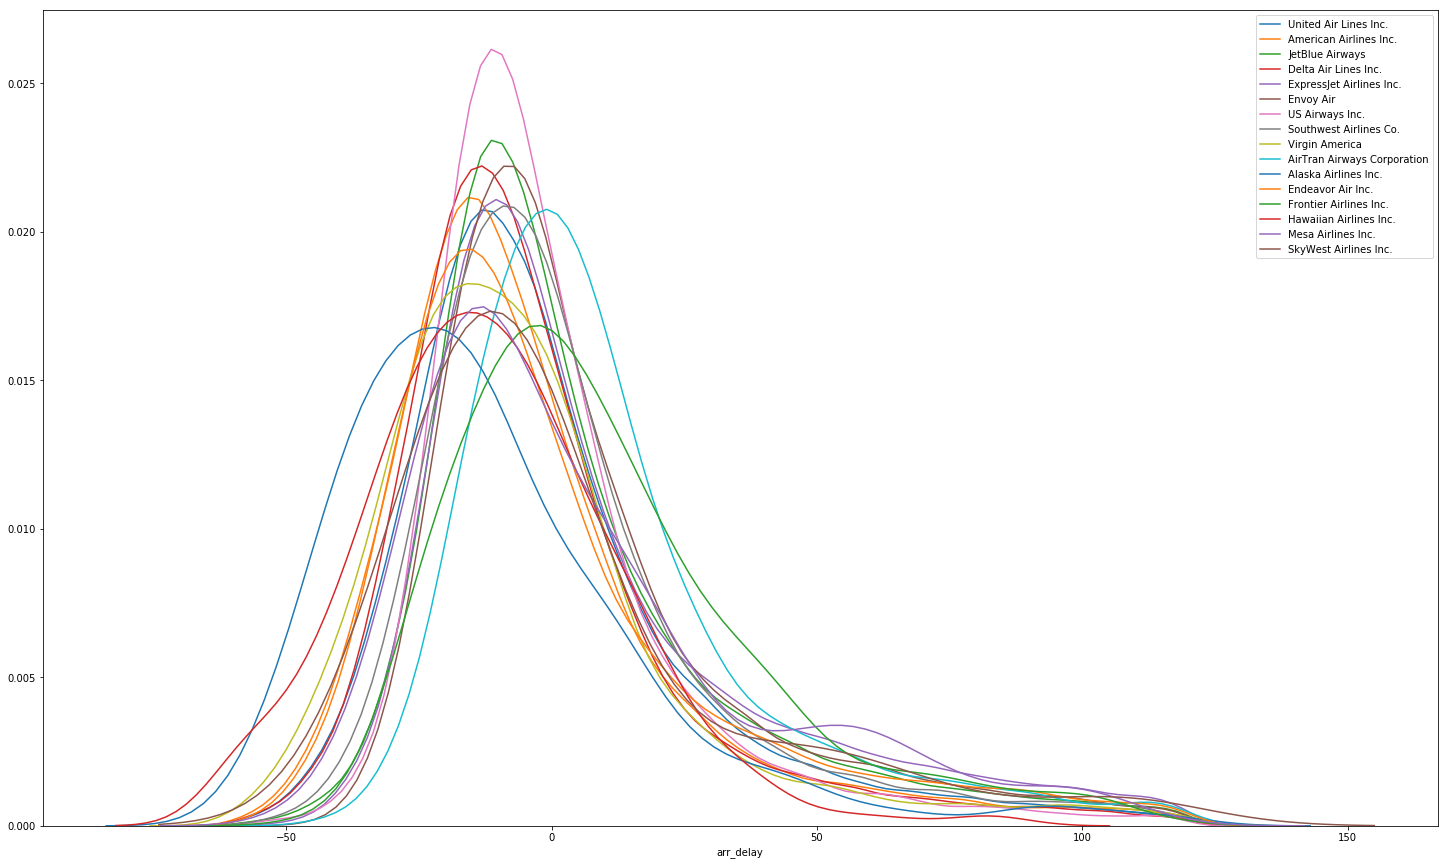

In [7]:
ax,fig = plt.subplots(figsize=(25,15))
for airline in airlines:
  sns.distplot(df[df.name == airline].arr_delay, hist=False, label=airline)

**So I would Have chosen  Alaska , Frontier or Hawain airlines since , the delays for them are moreover identical. Also, they have the least probability of getting delayed compared  to all the flights , along with , moreover they tend to arrive early than other flights .**

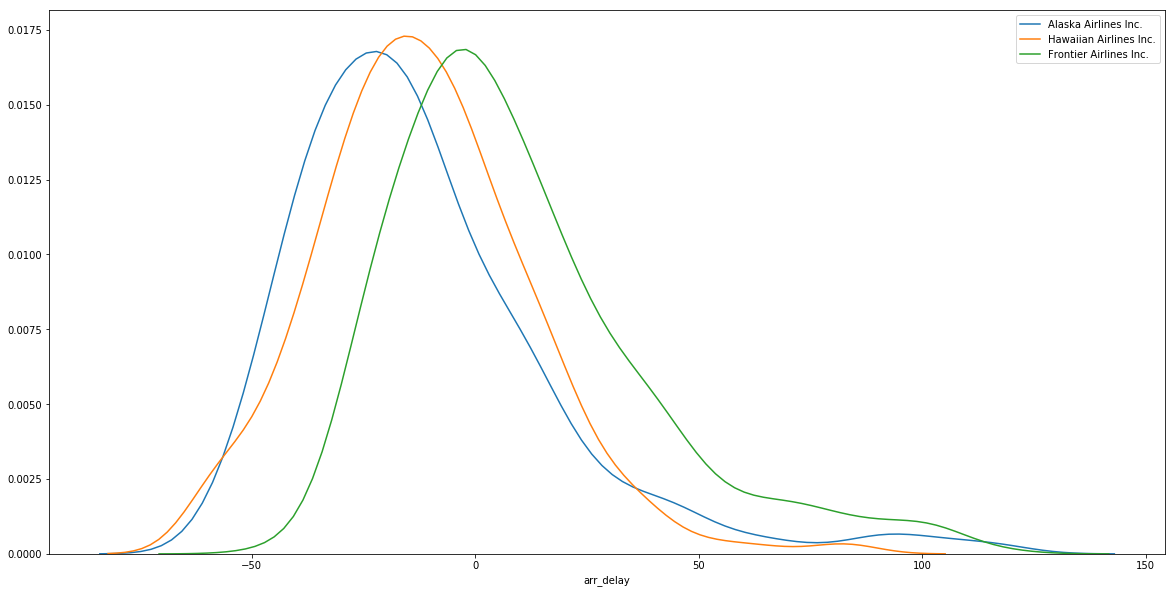

In [8]:
ax, fig = plt.subplots(figsize=(20,10))
preferred_airline = ['Alaska Airlines Inc.', 'Hawaiian Airlines Inc.', 'Frontier Airlines Inc.']
for airline in preferred_airline:
  sns.distplot(df[df.name == airline].arr_delay, hist=False, label=airline)



now the test for the central limit theorem the 4 things are:

    * The sampling dist of the mean will be less spread than the values in the population from which the sample is drawn

    * The sampling dist will be well-modeled by a normal dist.

    * The spread of the sampling dist. is related to the spread of the population values 
    ```$\mu_{sampling} = \mu_{population}$, $\sigma_{sampling} = \frac{\sigma_{population}}{ \sqrt{n}}$```

    * Bigger samples lead to a smaller spread in the sampling dist





In [11]:
# there is a method called samples provided by the pandas library which produces a sample of the main population .
df.sample(5)

,arr_delay,name
158717,59.0,ExpressJet Airlines Inc.
84907,56.0,United Air Lines Inc.
214303,-19.0,JetBlue Airways
293916,-33.0,United Air Lines Inc.
215267,-10.0,JetBlue Airways


In [12]:
## Making samples 
## n samples of m size of the main population (df)
def make_samples(df, n, m):
  samples = []
  for i in range(n):
    samples.append(df.sample(m))
  return samples

n = 500
m = 200

samples = make_samples(df,n,m)
print(samples[:3])
means = [np.mean(sample.arr_delay) for sample in samples]
stds = [np.std(sample.arr_delay) for sample in samples]

[        arr_delay                         name
282996      -30.0         Delta Air Lines Inc.
26822       -20.0        United Air Lines Inc.
106460       21.0              JetBlue Airways
164862       -1.0                    Envoy Air
188833      -12.0         Delta Air Lines Inc.
228133        3.0              US Airways Inc.
233525      -20.0       Southwest Airlines Co.
292346      -12.0              US Airways Inc.
188493       -9.0        United Air Lines Inc.
86150        26.0            Endeavor Air Inc.
28481        -9.0         Delta Air Lines Inc.
252654      -23.0        United Air Lines Inc.
267804      -10.0         Delta Air Lines Inc.
106462       21.0        United Air Lines Inc.
32419         6.0                    Envoy Air
66827         0.0               Virgin America
161035        5.0         Delta Air Lines Inc.
260948       -3.0        United Air Lines Inc.
44591        21.0        United Air Lines Inc.
92845        -6.0                    Envoy Air
278411      

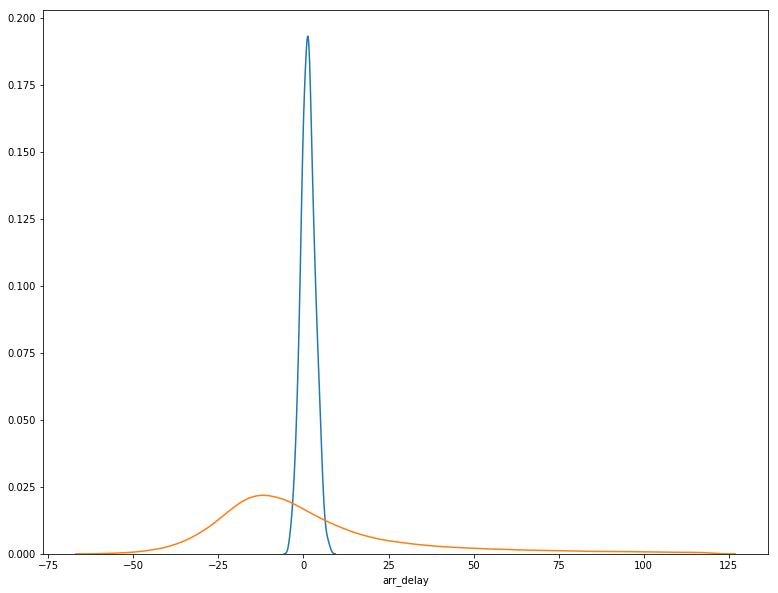

In [13]:
# First condition 
# The sampling dist of the mean will be less spread than the values in the population from which the sample is drawn
ax, fig = plt.subplots(figsize=(13,10))
sns.distplot(means, hist=False)
sns.distplot(df.arr_delay, hist=False)

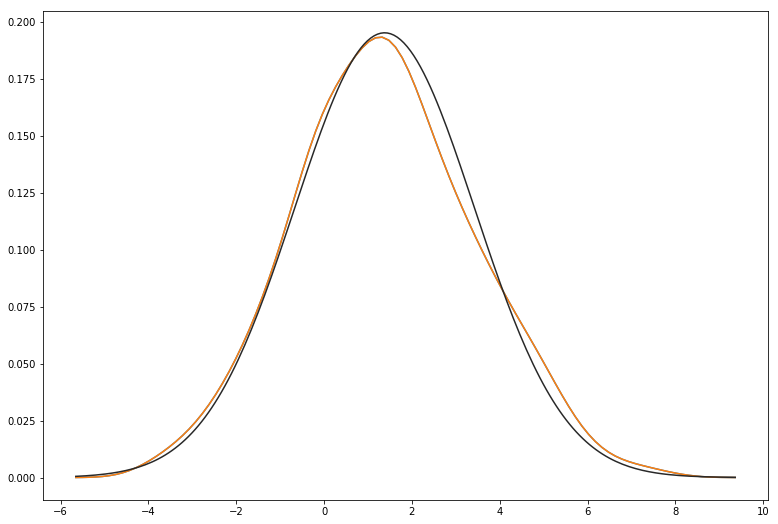

In [16]:
# Second condition .
## The sampling dist will be well-modeled by a normal dist.
from scipy.stats import norm
ax, fig = plt.subplots(figsize=(13,9))
sns.distplot(means, hist=False)
sns.distplot(means, fit=norm, hist=False)

In [19]:
## 3 and 4 condition
# First Mu_sampling = Mu_population
print("Mu_sampling = {:.2f} ... Mu_population = {:.2f}".format(np.mean(means), np.mean(df.arr_delay)))

Mu_sampling = 1.38 ... Mu_population = 1.30


In [0]:
## Which is approximately same ... 
## mean of the sample is equal to the mean of population

In [21]:
## std of samples is = std of population / root n
print("std of sample = {:.2f} ... std of population = {:.2f}".format(np.std(means), np.std(df.arr_delay)))

std of sample = 2.05 ... std of population = 29.06


In [26]:
print("std of pop divided by root n = {:.2f} ... std of sample = {:.2f}".format((np.std(df.arr_delay) / np.std(means)), np.sqrt(m)))

std of pop divided by root n = 14.21 ... std of sample = 14.14


In [0]:
## which is also approximately the same. 